# Импорты

In [451]:
import pandas as pd
import numpy as np
from pathlib import Path

## Дефолтные настройки Matplotlib

In [452]:
import matplotlib.pyplot as plt

# устанавливаем дефолтные размеры шрифтов
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [453]:
convert_type_dict = {'parameter1': float,
                    'parameter2': float,
                    'criteria1': float,
                    'criteria2': float,
                    'constraint1': bool,
                    'constraint2': bool,
                    }

Загрузка датасета

In [454]:
def load_data(path: Path):
    print("Read data set from path {path}".format(path=path))
    df = pd.read_csv(path).astype(convert_type_dict)
    return df

Непосредственно загрузка

In [455]:
data_1_path = Path("data/DataSet900.csv")
data_2_path = Path("data/DataSet1000.csv")
data_3_path = Path("data/DataSet100000.csv")
data_4_path = Path("data/DataSet129600.csv")

data_1 = load_data(data_1_path)
data_2 = load_data(data_2_path)
data_3 = load_data(data_3_path)
data_4 = load_data(data_4_path)

dataset = data_3

Read data set from path data\DataSet900.csv
Read data set from path data\DataSet1000.csv
Read data set from path data\DataSet100000.csv
Read data set from path data\DataSet129600.csv


Шапка датасета, первые 5 записей  набора данных.

In [456]:
dataset.head()

,parameter1,parameter2,criteria1,criteria2,constraint1,constraint2
0,88.012,12.817,100.829,-23819.000,True,False
1,56.818,49.060,105.878,-2580.510,True,False
2,33.049,31.159,64.208,-381.242,True,False
3,51.229,50.554,101.783,-215.838,True,False
4,59.320,23.653,82.973,-9297.220,True,False


Информация по колонкам

In [457]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   parameter1   100000 non-null  float64
 1   parameter2   100000 non-null  float64
 2   criteria1    100000 non-null  float64
 3   criteria2    100000 non-null  float64
 4   constraint1  100000 non-null  bool   
 5   constraint2  100000 non-null  bool   
dtypes: bool(2), float64(4)
memory usage: 3.2 MB


Основная статистическая информация по колонкам 

In [458]:
dataset.describe()

,parameter1,parameter2,criteria1,criteria2
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,55.016958,54.983437,110.000395,-21.315351
std,26.017546,25.957948,36.758778,12985.033086
min,10.000000,10.000000,20.459000,-31002.000000
25%,32.419000,32.527000,83.861750,-8846.925000
50%,55.103500,55.000000,110.009000,-19.349650
75%,77.491000,77.392000,136.442000,8785.945000
max,99.991000,99.991000,199.613000,30980.100000


Количество встречающихся значений `constraint1`

In [459]:
dataset["constraint1"].value_counts()

constraint1
True     74194
False    25806
Name: count, dtype: int64

Количество встречающихся значений `constraint2`

In [460]:
dataset["constraint2"].value_counts()

constraint2
False    50097
True     49903
Name: count, dtype: int64

Код описывающий сохранение графиков и рисунков

In [461]:
IMAGES_PATH = Path() / "imgs"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Представление о данных.
- по вертикали количество повторений
- по горизонтали величина значений

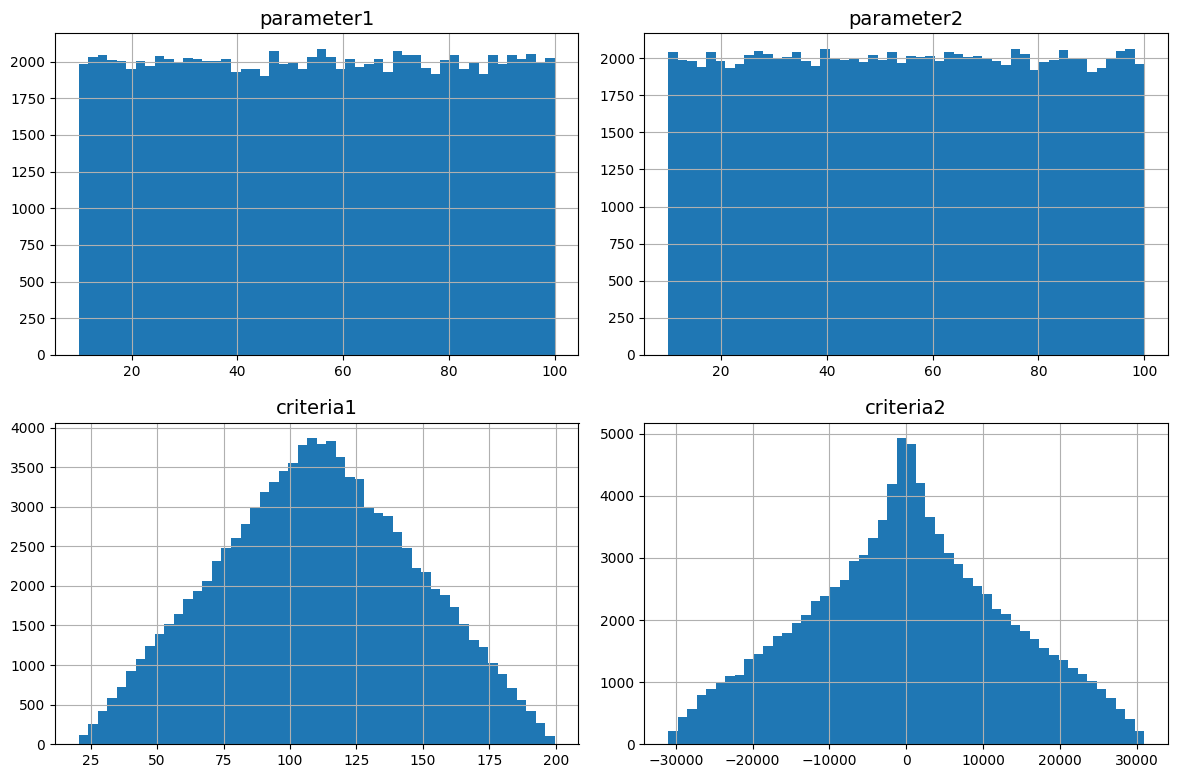

In [462]:
dataset.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

Устанавливаем параметр рандомизации (что бы значения повторялись при запуске)

In [463]:
np.random.seed(30)

# Тренировочный датасет

In [464]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=30)

## Корреляция параметров

In [465]:
corr_matrix = dataset.corr()
corr_matrix

,parameter1,parameter2,criteria1,criteria2,constraint1,constraint2
parameter1,1.000000,0.000355,0.708042,-0.692405,0.643041,-0.577238
parameter2,0.000355,1.000000,0.706422,0.691070,-0.388953,0.577137
criteria1,0.708042,0.706422,1.000000,-0.002065,0.180472,-0.001007
criteria2,-0.692405,0.691070,-0.002065,1.000000,-0.677332,0.798745
constraint1,0.643041,-0.388953,0.180472,-0.677332,1.000000,-0.590906
constraint2,-0.577238,0.577137,-0.001007,0.798745,-0.590906,1.000000


In [466]:
from pandas.plotting import scatter_matrix

attributes = ["parameter1", "parameter2", "criteria1",
              "criteria2"]
scatter_matrix(dataset[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

## Эксперименты с атрибутами

In [ ]:
# train_data["criteria2_parameter1"] = train_data["criteria2"] / train_data["parameter1"]
# train_data["criteria2_parameter2"] = train_data["criteria2"] / train_data["parameter2"]
# train_data["parameter1_parameter2"] = train_data["parameter1"] * train_data["parameter2"]

# corr_matrix = train_data.corr()
# corr_matrix["criteria1"].sort_values(ascending=False)

Новый критерий сильно коррелирует с нашим параметром

# Общие функции

Описание модели обучения

In [ ]:
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


class MyModel():
    def  __init__(self,
                  data:pd.DataFrame,
                  features: list,
                  predict_label_name: str,
                  model):
        self.data = data
        self.features = features
        self.predict_label_name = predict_label_name
        self.model: LinearRegression = model
        
        self.split_data()
    
    def split_data(self):
        self.train_data, self.test_data = train_test_split(
            self.data, test_size=0.95, random_state=30)
        
        self.train_data_values = self.train_data[self.features]
        self.train_data_labels = self.train_data[self.predict_label_name]
        
        self.test_data_values = self.test_data[self.features]
        self.test_data_labels = self.test_data[self.predict_label_name]
    
    def fit(self):
        self.model = self.model.fit(self.train_data_values, self.train_data_labels)
    
    def get_predict(self):
        return self.model.predict(self.test_data_values)
    
    def get_test_labels(self):
        return self.test_data_labels 
    
    def get_model(self):   
        return self.model

    def save_model(self):
        name = '_'.join(self.features+[self.predict_label_name])
        pkl_filename = "saved_model/"+name+".pkl" 
        with open(pkl_filename, 'wb') as file: 
            pickle.dump(self.model, file) 
    
    def load_model(self, pkl_filename):
        with open(pkl_filename, 'rb') as file: 
            self.model = pickle.load(file)
        
                

# Создаём модели и обучаем

In [ ]:
from typing import List
from copy import deepcopy

from sklearn.linear_model import (
    LinearRegression, 
    SGDRegressor,
    SGDClassifier
) 
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor
)
from sklearn.metrics import (
    mean_squared_error,
    accuracy_score, 
)
from sklearn.model_selection import cross_val_score


принцип именования сначала критерий который нужно предсказать, следом параметры по которым обучается модель

In [ ]:
def MSE_metric(parameters_list, model, data):
    models: List[MyModel] = []
    for parameters in parameters_list:
        models.append(
            MyModel(
                data=data,
                features=parameters[0],
                predict_label_name=parameters[1],
                model=deepcopy(model),
            )
        )
    
    for model in models:
        print('''
              ***************************************''')
        print("Begin predict {} from {}".format(model.predict_label_name,
                                               '_'.join(model.features)))
        model.fit()
        
        predict = model.get_predict()
        print('Predict:', predict[:6])
        labels = model.get_test_labels()
        print('Test:', labels[:6].tolist())
        score = mean_squared_error(
            labels,
            predict,
            squared=False
        )        
        print("Score MSE {}".format(score))
        model.save_model()
  
    
calculation_list_1 = [
    [['parameter1', 'parameter2'], 'criteria1'],
    [['parameter1', 'parameter2'], 'criteria2'],
    [['criteria1', 'criteria2'], 'parameter1'],
    [['criteria1', 'criteria2'], 'parameter2'],
    [['criteria1', 'criteria2', 'constraint1', 'constraint2'], 'parameter1'],
    [['criteria1', 'criteria2', 'constraint1', 'constraint2'], 'parameter2'],
]

In [ ]:
def AC_metric(parameters_list, model, data):
    models: List[MyModel] = []
    for parameters in parameters_list:
        models.append(
            MyModel(
                data=data,
                features=parameters[0],
                predict_label_name=parameters[1],
                model=deepcopy(model),
            )
        )
    
    for model in models:
        print('''
              ***************************************''')
        print("Begin predict {} from {}".format(model.predict_label_name,
                                               '_'.join(model.features)))
        model.fit()
        ml_model = model.get_model()
        predict = model.get_predict()
        # print('Predict:', predict[:6])
        labels = model.get_test_labels()
        # print('Test:', labels[:6].tolist())
        
        score = accuracy_score(
            predict,
            labels
        )
        print("Score CVS {}".format(score))
        
calculation_list_2 = [  
    [['criteria1', 'criteria2'], 'constraint1'],
    [['criteria1', 'criteria2'], 'constraint2'],
    [['parameter1', 'parameter2'], 'constraint1'],
    [['parameter1', 'parameter2'], 'constraint2'],
    [['criteria1', 'criteria2', 'parameter1', 'parameter2'], 'constraint1'],
    [['criteria1', 'criteria2', 'parameter1', 'parameter2'], 'constraint2'],
]

# Метрика СКО
принцип именования сначала критерий который нужно предсказать, следом параметры по которым обучается модель

Модель обучения  - лес регрессии.

In [ ]:
random_forest_model_regressor = RandomForestRegressor()
SGD_model = SGDRegressor()
linear_regression_model = LinearRegression()

print('Next random_forest_model_regressor >>>>>>>>>>>>>>>>>>>>>>')
MSE_metric(calculation_list_1, random_forest_model_regressor, dataset)

# print('Next linear_regression_model >>>>>>>>>>>>>>>>>>>>>>')
# MSE_metric(calculation_list_1, linear_regression_model, dataset)

# print('Next SGD_model >>>>>>>>>>>>>>>>>>>>>>')
# MSE_metric(calculation_list_1, SGD_model, dataset)

Next random_forest_model_regressor >>>>>>>>>>>>>>>>>>>>>>

              ***************************************
Begin predict criteria1 from parameter1_parameter2


Predict: [123.25529 109.15976 145.93844  95.04704 136.12916 126.76628]
Test: [122.888, 109.289, 145.694, 95.456, 136.397, 126.56]
Score MSE 0.514912180124154

              ***************************************
Begin predict criteria2 from parameter1_parameter2
Predict: [ 23343.904  26839.494  15814.007  18111.583  23023.671 -14280.362]
Test: [23453.4, 26806.4, 15966.8, 17926.5, 22927.1, -14048.8]
Score MSE 175.62282686182434

              ***************************************
Begin predict parameter1 from criteria1_criteria2
Predict: [31.24    16.09606 55.60381 18.11206 41.77261 80.8012 ]
Test: [31.069, 15.607, 55.405, 17.839, 41.446, 80.947]
Score MSE 0.37296979110665857

              ***************************************
Begin predict parameter2 from criteria1_criteria2
Predict: [91.63477 93.745   90.388   77.43178 95.07817 45.94312]
Test: [91.819, 93.682, 90.289, 77.617, 94.951, 45.613]
Score MSE 0.33591224900128963

              ***************************************
Beg

# Простая метрика
Модель обучения  - лес классификации.

In [ ]:
random_forest_model_classifier = RandomForestClassifier()
SGD_model = SGDClassifier()

print('Next random_forest_model_classifier >>>>>>>>>>>>>>>>>>>>>>')
AC_metric(calculation_list_2, random_forest_model_classifier, dataset)

# print('Next SGD_model >>>>>>>>>>>>>>>>>>>>>>')
# AC_metric(calculation_list_2, SGD_model, dataset)

Next random_forest_model_classifier >>>>>>>>>>>>>>>>>>>>>>

              ***************************************
Begin predict constraint1 from criteria1_criteria2
Score CVS 0.9932

              ***************************************
Begin predict constraint2 from criteria1_criteria2
Score CVS 0.9996842105263158

              ***************************************
Begin predict constraint1 from parameter1_parameter2
Score CVS 0.9934631578947368

              ***************************************
Begin predict constraint2 from parameter1_parameter2
Score CVS 0.9908526315789473

              ***************************************
Begin predict constraint1 from criteria1_criteria2_parameter1_parameter2
Score CVS 0.9946

              ***************************************
Begin predict constraint2 from criteria1_criteria2_parameter1_parameter2
Score CVS 0.9996947368421053


# Вывод:
Результаты говорят что прогнозирование constraint1 и constraint2 весьма просто, так как там бинарный предикт. Остальные значения тоже можно прогнозировать однако с некоторой ошибкой, можно настроить гипперпараметры и тогда возможно результат улучшится.

# Применение нейронных сетей

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

## Установить роботу с куда или нна цп

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


# Working with data

In [ ]:
class MyDataset(Dataset):
    '''
    Dataset:
    '''
    def __init__(self, 
                 data:pd.DataFrame,
                 input_colums: List[str],
                 output_colums: List[str]) -> None:
        self.input_colums = input_colums
        self.output_colums = output_colums
        
        x = data[self.input_colums].values
        y = data[self.output_colums].values
        
        self.x_train = torch.tensor(x, dtype=torch.float32)
        self.y_train = torch.tensor(y, dtype=torch.float32)      
        
    def __len__(self):
        return len(self.y_train)
    
    def __getitem__(self, index):
        return self.x_train[index], self.y_train[index]    

# Creating Models

In [ ]:

class NeuralNetwork(nn.Module):
    '''
    Define neural network model:
    '''
    def __init__(self, inputs, outputs, middle_layers=128):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(            
            nn.Linear(inputs, middle_layers),
            nn.ReLU(),
            nn.Linear(middle_layers, middle_layers),
            nn.ReLU(),
            nn.Linear(middle_layers, middle_layers),
            nn.ReLU(),
            nn.Linear(middle_layers, outputs)
        )

    def forward(self, x: torch.Tensor):
        logits = self.linear_relu_stack(x)
        return logits

test = NeuralNetwork(2,2).to(device)
print(test)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=2, bias=True)
  )
)


# Optimizing the Model Parameters

In [ ]:
from numpy import mean
from sympy import prime
from torch.nn import MSELoss
from torch.optim import SGD

from sklearn.model_selection import train_test_split


class Trainer():
    '''
    Trainer:
    '''
    def __init__(self,
                 data:pd.DataFrame,
                 input_colums:List[str],
                 output_colums:List[str],
                 batch_size=32,
                 learning_rate=0.005,
                 shuffle=False,
                 test_size=0.2,
                 random_state=None,
                 save_path='saved_model/',
                 model_middle_layers=512):
        
        self.save_path = save_path
        
        self.input_colums = input_colums
        self.output_colums = output_colums
        
        self.uniq_name = '_'.join(input_colums + output_colums)
        
        self.data = data.copy()
        self.normalize_param = self._normalize_data(self.data, input_colums+output_colums)
        with open(save_path+self.uniq_name+'_normalize_params.pkl', 'wb') as file: 
            pickle.dump(self.normalize_param, file)

        train_set, test_set = train_test_split(self.data, test_size=test_size, random_state=random_state)
                
        self.train_dataloader = DataLoader(
            MyDataset(train_set, input_colums, output_colums),
            batch_size=batch_size,
            shuffle=shuffle
        )
        self.test_dataloader = DataLoader(
            MyDataset(test_set, input_colums, output_colums),
            batch_size=batch_size,
            shuffle=False
        )
        
        self.model = NeuralNetwork(
            inputs=len(input_colums),
            outputs=len(output_colums),
            middle_layers=model_middle_layers
        ).to(device)
        
        self.loss_func = MSELoss()
        self.optimizer = SGD(self.model.parameters(), lr=learning_rate)  
        
        self.validate_loss_list = []     
        self.train_loss_list = []
    
    def train(self):
        size = len(self.train_dataloader.dataset)
        self.model.train()
        train_loss = 0.
        for batch, (X, y) in enumerate(self.train_dataloader):
            X, y = X.to(device), y.to(device)

            # Compute prediction error
            pred = self.model(X)
            loss: torch.Tensor = self.loss_func(pred, y)

            # Backpropagation
            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()
            train_loss += loss.item()
        
        avg_loss = train_loss/len(self.train_dataloader)
        self.train_loss_list.append(avg_loss)
        return avg_loss
                
    def validate(self):
        num_batches = len(self.test_dataloader)
        self.model.eval()
        val_loss_sum = 0
        with torch.no_grad():
            for X, y in self.test_dataloader:
                X, y = X.to(device), y.to(device)
                pred = self.model(X)
                val_loss_sum += self.loss_func(pred, y).item()
        avg_loss = val_loss_sum/self.test_dataloader.batch_size
        self.validate_loss_list.append(avg_loss)
        return avg_loss        
        
    def run(self,  epochs=10):
        for t in range(epochs):
            train_avg_loss = self.train()
            print(f'Epoch [{t + 1:03}/{epochs:03}] | Train Loss: {train_avg_loss:.6f}')
            
            val_avg_loss = self.validate()
            print(f"Validation AVG Loss: {val_avg_loss:>12f} \n")
            
        print("Done!")
    
    # def predict(self, input: np.array):
    #     print('Входные данные:', input)
    #     for index, item in enumerate(self.input_colums):
    #         input[index] = (input[index] - self.normalize_param[item]['mean']) /\
    #             self.normalize_param[item]['std']
    #     print('Нормализованные:', input)
    #     pred:torch.Tensor = self.model(torch.tensor(input, dtype=torch.float32))        
    #     pred = pred.detach().numpy()
    #     print('Вывод модели:', pred)
    #     for index, item in enumerate(self.output_colums):
    #         # pred[index] = pred[index] * self.normalize_param[item]['lenght']
    #         pred[index] = pred[index] * self.normalize_param[item]['std'] +\
    #             self.normalize_param[item]['mean']
    #     print('Денормализованные данные:', pred)
    #     return pred  
    
    def predict(self, input: np.array):
        input.astype(float)
        print('Входные данные:', input)
        for index, item in enumerate(self.input_colums):
            input[index] = 2 * ((input[index] - self.normalize_param[item]['min']) /\
                (self.normalize_param[item]['max'] - self.normalize_param[item]['min'])) -1
        print('Нормализованные:', input)
        pred:torch.Tensor = self.model(torch.tensor(input, dtype=torch.float32))        
        pred = pred.detach().numpy()
        print('Вывод модели:', pred)
        for index, item in enumerate(self.output_colums):
            pred[index] = (1 + pred[index]) / 2 * \
                (self.normalize_param[item]['max'] - self.normalize_param[item]['min']) +\
                    self.normalize_param[item]['min']
        print('Денормализованные данные:', pred)
        return pred  
    
    def _normalize(self,
                   data: pd.DataFrame,
                   colum: str) -> torch.Tensor:
        max_val = data[colum].max()
        min_val = data[colum].min()
        data[colum] = 2 * ((data[colum] - min_val) / (max_val - min_val)) -1
        return {'max': max_val, 'min': min_val}
    
    # def _normalize(self,
    #                data: pd.DataFrame,
    #                colum: str) -> torch.Tensor:
    #     mean = data[colum].mean()
    #     std = data[colum].std()
    #     data[colum] = (data[colum] - mean) / std  
    #     return {'mean': mean, 'std': std}
    
    def save_model(self):
        torch.save(self.model, self.save_path+self.uniq_name+'_model_weights.pth')       
    
    def _normalize_data(self, data, colums):
        params = {}
        for colum in colums:
            params[colum] = self._normalize(data, colum)
        return params
    
    def _denormalize(self, tensor, mean, std) -> torch.Tensor:
        return tensor * std
    
    def plot_train_result(self):
        plt.plot(range(len(self.train_loss_list)), self.train_loss_list, self.validate_loss_list)

In [ ]:
class LoadModel():
    def __init__(self, model_path, normalize_params_path, input_colums, output_colums) -> None:
        self.input_colums = input_colums
        self.output_colums = output_colums
        self._model_path = model_path
        with open(normalize_params_path, 'rb') as file: 
            self.normalize_params = pickle.load(file)
        self.model = torch.load(model_path)
        self.model.eval()
    
    def predict(self, input):
        # print('Входные данные:', input)
        for index, item in enumerate(self.input_colums):
            input[index] = (input[index] - self.normalize_params[item]['mean']) /\
                self.normalize_params[item]['std']
        # print('Нормализованные:', input)
        pred:torch.Tensor = self.model(torch.tensor(input, dtype=torch.float32))        
        pred = pred.detach().numpy()
        # print('Вывод модели:', pred)
        for index, item in enumerate(self.output_colums):
            pred[index] = pred[index] * self.normalize_params[item]['std'] +\
                self.normalize_params[item]['mean']
        # print('Денормализованные данные:', pred)
        return pred 

# Анализ

In [ ]:
# First star
data_1_path = Path("data/DataSet900.csv")
data_2_path = Path("data/DataSet1000.csv")
data_3_path = Path("data/DataSet100000.csv")
data_4_path = Path("data/DataSet129600.csv")

dataset = load_data(data_1_path)

Read data set from path data\DataSet900.csv


In [ ]:
dataset.head()

,parameter1,parameter2,criteria1,criteria2,constraint1,constraint2
0,10.0,10.0,20.0,0.000,True,False
1,10.0,13.0,23.0,216.770,True,True
2,10.0,16.0,26.0,490.088,True,True
3,10.0,19.0,29.0,819.956,False,True
4,10.0,22.0,32.0,1206.370,False,True


# Проверка 1 
input_colums=['criteria1', 'criteria2'],

output_colums=['parameter1', 'parameter2'],

In [ ]:
trainer_1 = Trainer(
    data=dataset,
    input_colums=['criteria1', 'criteria2'],
    output_colums=['parameter1', 'parameter2'],
    batch_size=1000,
    learning_rate=0.0005,
    shuffle=False,
    test_size=0.2,
    random_state=30,
    save_path='saved_model/',
    model_middle_layers=256,
)
trainer_1.run(5000)


Epoch [001/5000] | Train Loss: 0.365508
Validation AVG Loss:     0.000342 

Epoch [002/5000] | Train Loss: 0.365362
Validation AVG Loss:     0.000342 

Epoch [003/5000] | Train Loss: 0.365215
Validation AVG Loss:     0.000341 

Epoch [004/5000] | Train Loss: 0.365069
Validation AVG Loss:     0.000341 

Epoch [005/5000] | Train Loss: 0.364923
Validation AVG Loss:     0.000341 

Epoch [006/5000] | Train Loss: 0.364777
Validation AVG Loss:     0.000341 

Epoch [007/5000] | Train Loss: 0.364632
Validation AVG Loss:     0.000341 

Epoch [008/5000] | Train Loss: 0.364486
Validation AVG Loss:     0.000341 

Epoch [009/5000] | Train Loss: 0.364341
Validation AVG Loss:     0.000341 

Epoch [010/5000] | Train Loss: 0.364196
Validation AVG Loss:     0.000341 

Epoch [011/5000] | Train Loss: 0.364051
Validation AVG Loss:     0.000340 

Epoch [012/5000] | Train Loss: 0.363907
Validation AVG Loss:     0.000340 

Epoch [013/5000] | Train Loss: 0.363762
Validation AVG Loss:     0.000340 

Epoch [014/5

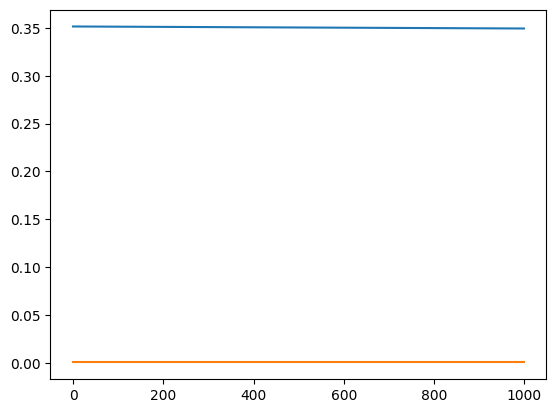

In [ ]:
trainer_1.plot_train_result()

In [ ]:
trainer_1.save_model()
trainer_1.predict(np.array([38.,	-716.]))

print(trainer_1.normalize_param)

# # Next starts
# load_model = LoadModel(
#     'saved_model/model_weights.pth',
#     'saved_model/normalize_params.pkl',
#     input_colums=['criteria1', 'criteria2'],
#     output_colums=['parameter1', 'parameter2']
# )
# print(load_model.predict(np.array([47,	3100.75])))

Входные данные: [  38. -716.]
Нормализованные: [-0.79310345 -0.02448273]
Вывод модели: [0.02600483 0.04913327]
Денормализованные данные: [54.63121 55.6373 ]
{'criteria1': {'max': 194.0, 'min': 20.0}, 'criteria2': {'max': 29245.1, 'min': -29245.1}, 'parameter1': {'max': 97.0, 'min': 10.0}, 'parameter2': {'max': 97.0, 'min': 10.0}}


In [ ]:
dataset.iloc[122:128]

,parameter1,parameter2,criteria1,criteria2,constraint1,constraint2
122,22.0,16.0,38.0,-716.283,True,False
123,22.0,19.0,41.0,-386.416,True,False
124,22.0,22.0,44.0,0.000,True,False
125,22.0,25.0,47.0,442.965,True,True
126,22.0,28.0,50.0,942.478,True,True
127,22.0,31.0,53.0,1498.540,True,True


# Визуальное сравнение
Таблица сверху тестовые данные, снизу можно оценить примерную точность, взять значения из criteria1	criteria2 и получатся параметры parameter1	parameter2

In [ ]:
trainer.predict(np.array([70,	82], dtype=np.float32))


Входные данные: [70. 82.]
Нормализованные: [-0.42528737  0.00280389]
Вывод модели: [-0.05525138 -0.07415187]
Денормализованные данные: [35.       53.621967]


array([35.      , 53.621967], dtype=float32)

In [ ]:
trainer.predict(np.array([34., 25.]))

Входные данные: [34. 25.]
Нормализованные: [-0.83908046  0.00085484]
Вывод модели: [-0.09794222 -0.11397348]
Денормализованные данные: [17.       53.537186]


array([17.      , 53.537186], dtype=float32)

In [ ]:
type(trainer.predict(np.array([47,	3100.75])))

Входные данные: [  47.   3100.75]
Нормализованные: [-0.68965517  0.10602631]
Вывод модели: [-0.10213335 -0.08918881]
Денормализованные данные: [23.5      58.112144]


numpy.ndarray

## Best result
Test Error: Avg loss: 0.001735 

learning rate 0.0005

Epoch = 10000

batch_size = 120

# Save model

In [ ]:
trainer.save_model()


PicklingError: Can't pickle <class '__main__.NeuralNetwork'>: it's not the same object as __main__.NeuralNetwork

# Load  model